# Homework 2

## Introduction
The objective of this assignment is to examine the fundamentals of dynamic programming by implementing an edit distance algorithm. This approach emphasizes understanding how dynamic programming optimizes the process of comparing sequences by breaking down the problem into manageable sub-problems. We begin by generating random DNA sequences to serve as test cases, then apply our dynamic programming solution to compute the minimum number of operations required to transform one sequence into another. By testing our algorithm on real data, we further explore the efficiency and robustness of dynamic programming in solving complex computational tasks.


In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Function Implementation
Here we implement two functions in order to apply dynamic programming towards a real life case. The first function we implement generates a random DNA sequence of length 400 with nucleotides adenine (A), cytosine (C), thymine (T), and guanine (G). The next function we implement calculates the edit distance between two strings. In order to accomplish this we utilize dynamic programming, saving essential edit distance values in a matrix of size (n + 1) x (m + 1) with n being the length of the input string and m being the length of the desired string. We then fill the top row and left-most column of the matrix according to the deletion costs and insertion costs respectively. We use those values to calculate the remaining values within the matrix and find the total edit distance as the matrix value \[n+1, m+1], which we return.

In [25]:
# Create a function to generate random DNA sequences
def random_sequence(length=400):
    sample = 'ACTG'
    return ''.join(random.choices(sample, k=length))

# Create the edit distance algorithm
def edit_distance(x, y):
    n = len(x)
    m = len(y)
    
    # Create a matrix of size (n + 1) x (m + 1)
    opt = [[0] * (m + 1) for _ in range (n + 1)]
    
    # Base cases: if y is empty or x is empty
    for i in range(n + 1):
        opt[i][0] = i
    for j in range(m + 1):
        opt[0][j] = j
        
    # Compute edit distances
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if x[i - 1] == y[j - 1]:
                cost = 0 # Cost if they are the same
            else:
                cost = 1 # Cost for substitution
                
            opt[i][j] = min(opt[i - 1][j - 1] + cost, # Cost for substitution
                            opt[i - 1][j] + 1, # Cost for deletion
                            opt[i][j - 1] + 1) # Cost for addition
    
    return opt[n][m] # Edit distance is at the corner of the matrix

## Analysis and Interpretation
In this section, we simulate a number of random DNA sequences in order to determine the trend in edit distances. For out study, we generate 20 random DNA sequences. For each distinct pair of DNA sequences 20C2 or 190 pairs, we compute the edit distance and store it within an array. Then we graph the edit distance distribution on a histogram and display the average.

According to the graph, the edit distance distribution seems to be relatively symmetric, distributed around the mean of approximately 213. This is likely because of the fact that each DNA sequence in our sample is randomly generated, leading the edit distances to be approximately normally distributed and centered around an edit distance of about half the length of the genetic sequences.

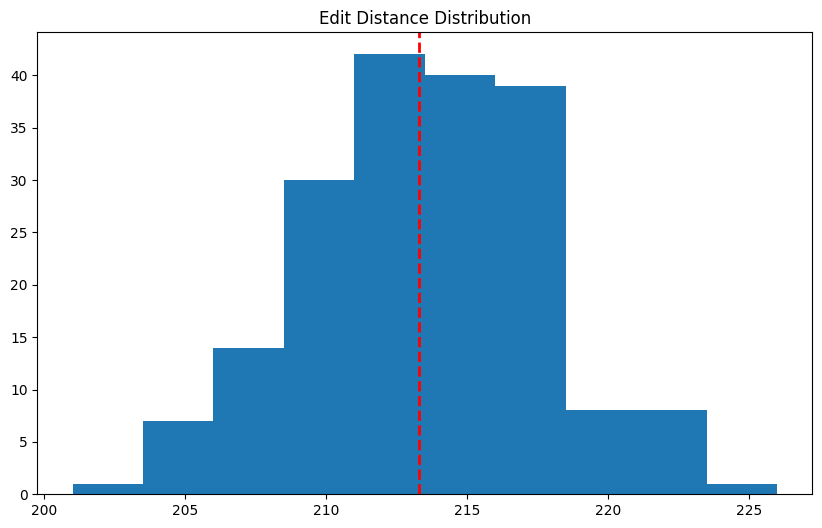

In [26]:
# Set seed
random.seed(18)

# Generate 20 random DNA sequences
sequences = []
for i in range(20):
    sequences.append(random_sequence())
    
# Calculate the edit distance between each distinct pair of sequences
editDistances = []
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        editDistances.append(edit_distance(sequences[i], sequences[j]))
        
# Calculate average edit distance
mean = np.mean(editDistances)

# Plot edit distances
plt.figure(figsize=(10, 6))
plt.hist(editDistances)
plt.title('Edit Distance Distribution')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.show()

## Application
Here we apply our edit distance algorithm towards real life data, specifically genetic sequence data from the National Center for Biotechnology Information. In our study, we compare the edit distances for each distinct pair within a group of 12 species (12C2 or 66 pairs). We repeat the same procedure from our simulation, calculating the mean of the edit distances and plotting the distribution in a histogram.

This time, our edit distance distribution seems to be left skewed with an average edit distance of about 122. The highest frequency of edit distances have about 175 while the lowest frequency of edit distances having very low edit distances. Overall, compared to the simulation, which was entirely random, these edit distances are a lot lower. This can be attributed to the fact that all of the species within the group are of hominids with similar genetic sequences. Particularly, the lowest edit distances can be associated with closely related pairs like the German and Russian Neanderthals and the Puti and Jari Orangutan. The highest edit distances can also be associated with the least related pairs such as the European Human and either Orangutan.

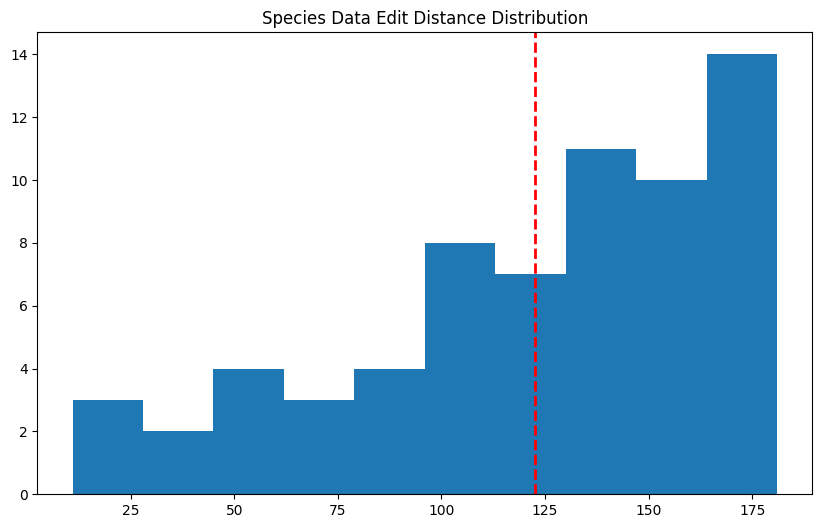

In [27]:
# Created my own CSV file because BioPython library did not work
df = pd.read_csv('Species Data (ECS 117 HW 2).csv')
df['DNA Sequence'] = df['DNA Sequence'].astype(str).str.replace('\n', '', regex=False)
sequences2 = df['DNA Sequence'].values

# Calculate the edit distance for each distinct pair within the species data
editDistances2 = []
for i in range(len(sequences2)):
    for j in range(i + 1, len(sequences2)):
        editDistances2.append(edit_distance(sequences2[i], sequences2[j]))

# Calculate average edit distance for the species data
mean2 = np.mean(editDistances2)

# Plot the new edit distances
plt.figure(figsize=(10, 6))
plt.hist(editDistances2)
plt.title('Species Data Edit Distance Distribution')
plt.axvline(mean2, color='red', linestyle='dashed', linewidth=2)
plt.show()

## Conclusion
This assignment provided valuable insight into the trends in edit distances between randomly generated DNA sequences as well as existing, related DNA sequences. These insights were all made possible with the use of dynamic programming, in which we were able to conserve computational power by storing calculations within a matrix to avoid having to use recursion. Leveraging the power of dynamic programming, we were able to depict that the distribution of randomly generated DNA sequences was approximately normally distributed around a mean of half the size of the genetic sequence length. In our real life data study, we were further able to discern that related species shared similar DNA sequences that had edit distances of almost 0. Overall, this study has further solidified the usefulness of dynamic programming, allowing us to apply the fundamentals of non-recursive programming and optimize computational tasks for the future. 